Task 1: Standard and Poor’s (S&P) 500 Index prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
df = pd.read_csv('sp500_27270.csv')

correlations = df.corr()

In [4]:
#print(correlations)
i = 0
count = 0
finalDF = pd.DataFrame()

while(i < len(correlations.iloc[1])):
    if(correlations.iloc[1][i] >= 0.95 or correlations.iloc[1][i] <= -0.95):
        #print("true")
        finalDF = pd.concat([finalDF,df.iloc[:,i]], axis=1)
        count = count + 1
    
    i = i + 1

In [6]:
X = finalDF.iloc[:,1:]
y = finalDF.iloc[:,0]
X_scaled = preprocessing.scale(X)
y_scaled = preprocessing.scale(y)

#20% of the data was used as the testing data
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=1)

In [7]:
mlp = MLPRegressor(
    alpha=1e-6,
    hidden_layer_sizes=(15,2),
    max_iter=2000,
    random_state=1,
    solver='sgd',
    learning_rate_init = 0.005,
    early_stopping = True
    )

In [8]:
mlp.fit(X_train,Y_train)
#clf.fit(X_train,Y_train)


mlppreds = mlp.predict(X_test)
#preds = clf.predict(X_test)

print("Using sgd, and learning rate 0.005")
print(metrics.mean_squared_error(mlppreds, Y_test))

print("Using sgd, and learning rate 0.003")
mlp = MLPRegressor(
    alpha=1e-6,
    hidden_layer_sizes=(15,2),
    max_iter=2000,
    random_state=1,
    solver='sgd',
    learning_rate_init = 0.003,
    early_stopping = True
    )
mlp.fit(X_train,Y_train)
mlppreds = mlp.predict(X_test)
print(metrics.mean_squared_error(mlppreds, Y_test))

print("Using sgd, and learning rate 0.001")
mlp = MLPRegressor(
    alpha=1e-6,
    hidden_layer_sizes=(15,2),
    max_iter=2000,
    random_state=1,
    solver='sgd',
    learning_rate_init = 0.001,
    early_stopping = True
    )
mlp.fit(X_train,Y_train)
mlppreds = mlp.predict(X_test)
print(metrics.mean_squared_error(mlppreds, Y_test))

print("Using adam, and learning rate 0.005")
mlp = MLPRegressor(
    alpha=1e-6,
    hidden_layer_sizes=(15,2),
    max_iter=2000,
    random_state=1,
    solver='adam',
    learning_rate_init = 0.005,
    early_stopping = True
    )
mlp.fit(X_train,Y_train)
mlppreds = mlp.predict(X_test)
print(metrics.mean_squared_error(mlppreds, Y_test))

print("Using adam, and learning rate 0.003")
mlp = MLPRegressor(
    alpha=1e-6,
    hidden_layer_sizes=(15,2),
    max_iter=2000,
    random_state=1,
    solver='adam',
    learning_rate_init = 0.003,
    early_stopping = True
    )
mlp.fit(X_train,Y_train)
mlppreds = mlp.predict(X_test)
print(metrics.mean_squared_error(mlppreds, Y_test))


print("Using adam, and learning rate 0.001")
mlp = MLPRegressor(
    alpha=1e-6,
    hidden_layer_sizes=(15,2),
    max_iter=2000,
    random_state=1,
    solver='adam',
    learning_rate_init = 0.001,
    early_stopping = True
    )
mlp.fit(X_train,Y_train)
mlppreds = mlp.predict(X_test)
print(metrics.mean_squared_error(mlppreds, Y_test))




Using sgd, and learning rate 0.005
0.008152457594372711
Using sgd, and learning rate 0.003
0.010570551999561119
Using sgd, and learning rate 0.001
0.01877839572776674
Using adam, and learning rate 0.005
0.004733176345439207
Using adam, and learning rate 0.003
0.0036943687707376876
Using adam, and learning rate 0.001
0.005525183654165619


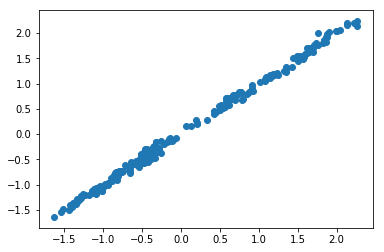

In [9]:
mlp = MLPRegressor(
    alpha=1e-6,
    hidden_layer_sizes=(15,2),
    max_iter=2000,
    random_state=1,
    solver='adam',
    learning_rate_init = 0.003,
    early_stopping = True
    )
mlp.fit(X_train,Y_train)
mlppreds = mlp.predict(X_test)

plt.scatter(mlppreds, Y_test)
plt.show()

Report:

20% of the data was used for testing, and 80% was used for training.

Scoring metric used was Mean Squared Error.

The values used for the learning rates were 0.001, 0.003, and 0.005.
The values used for the solver were adam and sgd.

Using sgd, and learning rate 0.005 resulted in the following mean squared error:
0.008152457594372711

Using sgd, and learning rate 0.003 resulted in the following mean squared error:
0.010570551999561119

Using sgd, and learning rate 0.001 resulted in the following mean squared error:
0.01877839572776674

Using adam, and learning rate 0.005 resulted in the following mean squared error:
0.004733176345439207

Using adam, and learning rate 0.003 resulted in the following mean squared error:
0.0036943687707376876

Using adam, and learning rate 0.001 resulted in the following mean squared error:
0.005525183654165619

Using adam and setting the learning rate to 0.003 resulted in the lowest mean absolute error of 0.0037. The adam optimizer performed better despite all values of the learning rate.

Early stopping was used as the regularization technique.

The difference where the prediction and true values mismatch most was probably due to outliers, meaning points that do not lie within the overall curve. The reason those points were mismatched is because since while training most points resulted in a certain curve, and since the number of outliers is too low, they do not affect the overall curve of the line, and therefore they were mismatched.